# Global Energy Balance

## Data from the [Earth Radiation Budget Experiment (ERBE)](http://www.nasa.gov/centers/langley/news/factsheets/ERBE.html)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap

In [6]:
# ERBE VARIABLES:  
#   sw       -  ALL-SKY SHORTWAVE RADIATION  
#   lw       -  ALL-SKY LONGWAVE RADIATION  
#   net      -  ALL-SKY NET RADIATION  
#   albedo   -  ALBEDO  
#   cssw     -  CLEAR-SKY SHORTWAVE RADIATION  
#   cslw     -  CLEAR-SKY LONGWAVE RADIATION  
#   csnet    -  CLEAR-SKY NET RADIATION  
#   csalbedo -  CLEAR-SKY ALBEDO 

data      = loadmat('/home/hub-vonw/Short Course on Atmospheric Radiative Transfer/content/data/erbe.mat')
lon       = data['mlon'][:]
lat       = data['mlat'][:]
sw        = data['sw'][:]
lw        = data['lw'][:]
net       = data['net'][:]
albedo    = data['albedo'][:]
cssw      = data['sw'][:]
cslw      = data['lw'][:]
csnet     = data['net'][:]
csalbedo  = data['albedo'][:]

### Example on how to create an ERBE map

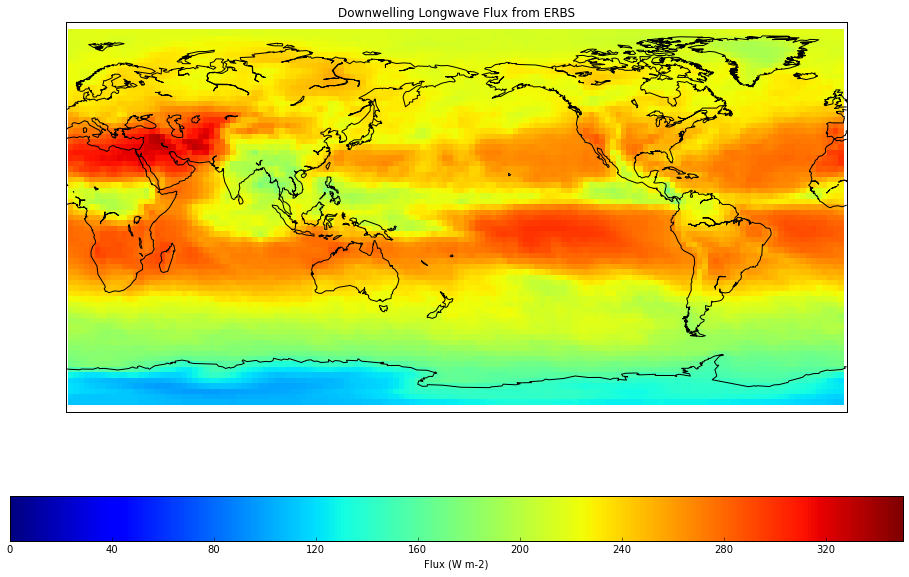

In [8]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='c')
x,y = m(*np.meshgrid(lon,lat))

figure(figsize=(16,10))
cmp = cm.jet
cmp.set_bad('gray')
lwp = m.pcolormesh(x,y,ma.array(lw,mask=isnan(lw)),cmap=cmp)
m.drawcoastlines()
lwp.set_clim(0,350)
cb=colorbar(orientation='horizontal')
cb.set_label('Flux (W m-2)')
title('Downwelling Longwave Flux from ERBS')
